## `Market Basket Analysis`
In the realm of data-driven insights, the convergence of Amazon's product recommendations and Netflix's movie suggestions finds its embodiment within the domain of Market Basket Analysis. This notebook embarks on a meticulous exploration of Market Basket Analysis, guided by the `Apriori algorithm`, an array of standardized and customized metrics, the intricate tapestry of association rules, complemented by the processes of aggregation and pruning. These facets culminate synergistically in the pinnacle of visualization. The voyage is dedicated to unearthing profound insights from a dataset representing a modest grocery establishment. However, it can be applied to any shopping experience. Through the integration of interactive elements, we endeavor to unveil latent wisdom, ultimately enriching our capacity to provide nuanced customer recommendations.

### `Unveiling Market Basket Analysis within the Grocery Retail Context`
The application of market basket analysis assumes heightened significance when applied to the nuanced landscape of a grocery store dataset. It functions as a compass, guiding us through the intricate labyrinth of consumer behavior within the store's aisles. Primarily, it unveils the symphony of product pairings that patrons frequently select together, casting light on the harmonious coexistence between categories like fresh produce and dairy items. Subsequently, it lays the groundwork for constructing informed recommendations based on these emerging patterns. For instance, it might suggest co-locating baking essentials with sugar and flour sections, while simultaneously advocating for the segregation of dietary items from indulgent sugary products.
- Discerning the orchestration of favored product pairings.
    - Evident harmony: Fresh produce and dairy items.
- Crafting recommendations informed by these revelations.
    - Strategic adjacency: Baking essentials in proximity to sugar-flour enclaves.
    - Segregation directive: Distinct separation for dietary and indulgent products.

### `A variety of Grocery-Centric Applications`
Market basket analysis unfurls its versatility within the realm of the grocery retail landscape. Its embrace extends to orchestrating tailored product suggestions, refining shelf arrangement strategies, and optimizing inventory management to heighten the quality of the shopping experience.
- Orchestrating tailored suggestions for grocery patrons.
- Enhancing shelf arrangement strategies for optimized accessibility.
- Fine-tuning inventory management to elevate the shopping experience.

### `Leveraging Market Basket Analysis`
Market basket analysis operates within the framework of `"association rules"`, constituting a cornerstone of this methodology. These rules encapsulate the intricate web of item associations, often derived from frequent joint acquisitions. An association rule takes the format of an `if-then relationship`, connecting two distinct sets of items. These subsets are categorized as the `"antecedent"` and the `"consequent"`. `In our context, the antecedent pertains to the initial set of items, while the consequent represents the subsequent set`.

For instance, consider the scenario where the act of purchasing fiction books demonstrates a discernible association with the acquisition of biographies, as evidenced by the transactions presented on the adjacent slide. This nexus is succinctly encapsulated in the following association rule: `"if fiction, then biography"`.

- Notebook Author: [Enio Rubens][1]
- Project: Market Basket Analysis
 
[1]: https://github.com/eniorubens/enioRubens_dataScienceProjects

In [ ]:
# Author : Enio Rubens
#
# Data Scientist
__author__ = 'Enio Rubens'

### `Parameters Intitilization`

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# Plot settings
sns.set_theme(style="ticks")
mpl.rcParams['figure.dpi'] = 96
mpl.rcParams['figure.figsize'] = (13.33,6.5)

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 20

# Axes labels
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelweight'] = 'bold'

# Grid and thicks
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.grid.axis'] = 'y'
#mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['ytick.left'] = False

# Legend
mpl.rcParams['legend.facecolor'] = 'w'
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.facecolor'] = 'white'
mpl.rcParams['legend.edgecolor'] = 'gray'
mpl.rcParams['legend.borderpad'] = 0.6

# Other
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10
#mpl.rcParams['scatter.edgecolors'] = None

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.max_colwidth = 1000

### `Dataset Initialization`
We use the Kaggle dataset in this [link](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset). 

Our voyage of discovery commences with the initiation of the dataset within a pandas DataFrame. A symphony of insights awaits as we navigate through the chords of this culinary emporium. This dataset boasts a triad of columns, each possessing its distinct essence, contributing harmoniously to the narrative.
- **Member_number:** Signifying the unique identifier of members, fostering a sense of individuality.
- **Date:** A chronological marker, adorned with temporal context, invoking a sense of sequence.
- **itemDescription:** A repository of textual descriptions, each encapsulating the essence of consumable treasures.

Now, we execute the pivotal act of dataset inception, igniting the journey that shall unfold in cells to come.

In [1]:
import os
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        display(os.path.join(dirname, filename))

'./dataset/Groceries_dataset.csv'

In [4]:
# Load transactions from pandas.
def read_data()->pd.DataFrame:
    return pd.read_csv("./dataset/Groceries_dataset.csv")
    
transaction = read_data()    
transaction.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


>As we tread the path ahead, the pages of our exploration shall be graced by the insights gleaned from this gastronomic repository, guiding us to enriched understandings.

### `Quantifying Item Assemblages`
In our quest for enlightenment, we just printed the first item in the list of transactions to see how it is formatted. We commence by casting our gaze upon the initial entry in the procession of transactions, peering into the very heart of its structure. As anticipated, the transaction lays bare its composition—a symphony of genres, elegantly threaded together within a list.

Thus armed with this enlightenment, we venture forth to invoke the `count` method, a potent instrument poised to unravel the cardinality of transactions that house the identical repertoire of items supplied for its perusal. As a demonstration of its prowess, we select a duo of items them unto the method's domain.

In this cerebral ballet, our understanding deepens as we traverse the intricate terrain of item assemblages, the foundation upon which our analyses shall be woven.

In [5]:
# Take a look at dataset
transactions = transaction.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions.head(6)

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yogurt]"
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
5,1001,02-05-2015,"[frankfurter, curd]"


In [6]:
# Retrieve data from the item description column and convert it to a list
transactions = transactions['itemDescription'].tolist()
transactions[:6]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd']]

In [7]:
# Count the number of transactions with sausage and whole milk
sausage = transactions.count(['sausage', 'whole milk'])

# Count the number of transactions with whole milk and pastry
whole_milk = transactions.count(['whole milk', 'pastry'])

# Count the number of transactions with sausage and hygiene articles
hygiene_articles = transactions.count(['sausage','hygiene articles'])

# Print the counts for each transaction.
print(f'''
Sausage with whole milk         : {sausage}
Whole milk with pastry          : {whole_milk}
Sausage with hygiene articles   : {hygiene_articles}'''
)


Sausage with whole milk         : 37
Whole milk with pastry          : 14
Sausage with hygiene articles   : 2


> **`Insights`**: as the results unfurl before us, a world of recommendations emerges like a canvas waiting for its brushstrokes. Here's a thought – why not consider placing sausages right next to whole milk? It's like a flavor symphony waiting to happen! Or how about a friendly cross-sell suggestion? In the upcoming cells, we'll explore the art of deciphering valuable association rules even in the face of challenges. 

#### `Navigating the Landscape of Association Rules`
Picture this: we're stepping into the heart of market basket analysis, where the magic happens. It's all about sifting through a vast variety of potential association rules and selecting the ones that genuinely matter for a specific business purpose.

#### `Unraveling Association Rules`
Remember, each association rule has two key players: the antecedent and the consequent. Imagine it like a dance partnership. A simple rule with one of each might be something like `"if health, then cooking."` But things can get more intricate. There are rules with multiple antecedents, like `"if humor and travel, then language."` And then there are those with multiple consequents, like `"if biography, then history and language."`

- `Association rules`
    - These gems hold an antecedent and a consequent
        - {sausage} → {whole milk}
- `The Complexity of Multi-Antecedent Rules`
    - Sometimes, it's a dynamic duo: {sausage, whole milk} → {semi-finished bread}
- `Venturing into Multi-Consequent Territory`
    - Other times, it's about ripple effects: {sausage} → {whole milk, semi-finished bread}

With this playful dance of rules, we're ready to dig deeper and uncover the secrets these associations hold for us!

#### `Navigating the Labyrinth of Rule Selection`
Here's the scoop: uncovering those golden nuggets of rules can be quite the challenge. In most cases, the sea of potential rules stretches far and wide, but only a handful are actually valuable for our purposes. This is where our artistry comes in—we need a way to sift through the haystack and find those needles.

- `The Challenge of Unearthing Value`
    - The rule possibilities are abundant.
    - Yet, most rules are mere clutter.
    - Our mission: Discerning the diamonds in the rough.

#### `The Quest for Simplicity`
Ever considered simplifying the quest? How about we focus on the basic stuff—simple rules, just one antecedent and one consequent. Sounds like a plan, right? But don't be deceived. Even in this realm of simplicity, challenges thrive, especially when we're working with a small dataset.
- `Distilling Complexity to Simplicity`
    - `Keeping it basic`: One antecedent, one consequent.
    - Deceptively simple, surprisingly intricate, even for modest datasets.

#### `Peering into the Metrics of Magic`
Market basket analysis revolves around the magical realm of rules. As we peer deeper into this labyrinth, we're on a quest to uncover rules that truly matter. But how do we identify the gems? Enter the stage: the all-important metric known as `support` and a process known as `pruning`.

As the curtains rise on the next act, brace yourself for an enchanting journey through metrics and mastery!

#### `Metrics Unveiled: Peering into Performance`
A metric is like a gauge, telling us how well a rule performs. Picture this: for a rule like "if bottled beer, then bottled water," a metric might proudly present the value 0.81. Now, for the rule "if brown bread, then butter," the same metric could whisper 0.23. These metrics guide us, helping us sift through the rule garden.
- `Diving into Metrics`
    - A peek into rule performance.
    - Metrics reveal the magic behind rules.
    - Example: {bottled beer} → {bottled water} - `Metric: 0.81`
    - Example: {brown bread} → {butter} - `Metric: 0.23`

#### `Pruning: The Art of Selectivity`
The art of pruning—our tool to weed out the less captivating rules. Picture this: we don't want a cluttered party, so we invite only the exceptional guests. With the help of our trusty metric, we usher in only those rules that meet a certain threshold. `If it's above, it's in; if it's below, it's out. Voilà!` "If bottled beer, then bottled water" gets a spot, while "if brown bread, then butter" waits outside.
- `Pruning the Rule Garden`
    - Guided by metrics to weed out the mediocre.
    - Example: {bottled beer} → {bottled water} - `In`!
    - Example: {brown bread} → {butter} - `Out`!

#### `The Magic of Support`

Let's talk about the heartbeat of market basket analysis—**support**. It's all about finding those much-loved items that grace countless transactions. Simple math works its charm:

$$
\begin{align*}  
    &\text{Support(A)} = \frac{\text{Transactions(A)}}{\text{Total Transactions}} \\[2em]
    &\text{Support(Eggs)} = \frac{3}{6} = \frac{1}{2} = 0.5 \\[2em]
    &\text{Support(Bacon)} = \frac{4}{6} = \frac{2}{3} = 0.667 \\[2em]
    &\text{Support(Apple)} = \frac{2}{6} = \frac{1}{3} = 0.333 \\[2em]
    &\text{Support(Eggs and Bacon)} = \frac{3}{6} = 0.5
\end{align*}
$$

The dance of support beckons us to unveil frequent companions in transactions. So, let's groove to the rhythm of support and unveil those beloved items! 

In [8]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,Fa

#### `Calculating Support: Unveiling Insights`
In the previous stage, we've weaved our dataset into a one-hot encoded marvel—the DataFrame known as `onehot`. In this juncture, armed with our trusty support metric, we're poised to offer a helping hand to the store owner.

#### `Frequent Favorites: Unveiling the Stars`
- `Step one`: let's spotlight the beloved items—the frequent flyers in our transactions. Our quest begins with the computation of support, illuminating the realm of items that patrons seem to gravitate towards.
- `Step two`: a test of connection. The rule in question — {jam} → {bread} — stands before us. Armed with the support metric, we query whether this rule basks in the glow of popularity, boasting a support value exceeding 0.05.

With these tools at hand, we stride forth to offer insights that'll enrich the store's strategies and choices! 

In [9]:
# Compute the support
support = onehot.mean().sort_values(ascending=False)

# Print the support
support.head(10)

whole milk          0.157923
other vegetables    0.122101
rolls/buns          0.110005
soda                0.097106
yogurt              0.085879
root vegetables     0.069572
tropical fruit      0.067767
bottled water       0.060683
sausage             0.060349
citrus fruit        0.053131
dtype: float64

In [10]:
# Add a whole milk + other vegetables column to the DataFrame onehot
support_1 = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Add a whole milk + rolls/buns column to the DataFrame onehot
support_2 = np.logical_and(onehot['whole milk'], onehot['rolls/buns']).mean()

# Add a whole milk + yogurt column to the DataFrame onehot
support_3 = np.logical_and(onehot['whole milk'], onehot['yogurt']).mean()

# Print support values
print(f'''
whole milk and other vegetables : {support_1:.4f}
whole milk and rolls/buns       : {support_2:.4f}
whole milk and yogurt           : {support_3:.4f}
''')


whole milk and other vegetables : 0.0148
whole milk and rolls/buns       : 0.0140
whole milk and yogurt           : 0.0112



> **`Insights`**: The world of numbers reveals its secrets, and our support metric brings clarity to the stage. Amidst the data's dance, two stars shine the brightest: whole milk and other vegetables. These gems emerge as prime contenders for cross-promotion, presenting a tantalizing opportunity for the store's owner to explore. The curtain rises on possibilities as we decipher these insights! 

#### `Confidence: Illuminating Relationships`
Confidence is the beacon that guides us through the labyrinth of purchase patterns. It's all about answering the question: `How sure are we that one item will be bought if another has been snatched off the shelf?`

Now, let's crack the code of this enchanting metric:

$$
\text{Confidence(A → B)} = \frac{\text{Probability(A and B)}}{\text{Support(A)}}
$$

In essence, confidence is akin to conditional probability in the world of statistics:

$$
P(B|A) = \frac{\text{P(A and B)}}{P(A)}
$$

But here's the twist—notation can vary. (A → B) and (B|A) may look different, but they're two sides of the same coin.

#### `Crunching the Numbers: Eggs and Bacon Dance`
Time for a numbers dance! Let's illustrate this with eggs and bacon, partners in the culinary waltz. Confidence brings them together:
- `Confidence(Eggs → Bacon)`
    - Assurance factor: 1
    - Interpretation: If eggs are purchased, bacon follows assuredly.
- `Confidence(Bacon → Eggs)`
    - Assurance factor: 0.75
    - Interpretation: If bacon is chosen, eggs tag along with a 75% likelihood.

As we play with numbers, we unlock the symphony of confidence that's at the heart of our market basket analysis!

#### `Fine-Tuning Insights: Unveiling Confidence's Direction`
A moment of contemplation leads us to the crossroads of direction. In the realm of relationships, should whole milk beckon forth other vegetables, or would whole milk better beckon rolls/buns? This question lingers in the air like a dance awaiting its choreography.

#### `The Confidence Metric Takes the Lead`
As we untangle this intricate dilemma, we turn to the confidence metric—the beacon that illuminates the way. Unlike the impartial stance of support, confidence takes sides. It's all about who leads whom in this culinary dance.

#### `The Duel of Directions`
And so, we embark on a duel of directions, computing the confidence metric for both contenders:
- `Confidence(whole milk → other vegetables)`
    - Directional guide: whole milk leading the way.
- `Confidence(other vegetables → whole milk)`
    - Directional guide: other vegetables at the helm.

As the numbers reveal their story, we find ourselves poised to offer a strategic direction based on the insights gleaned. Let's see which item takes center stage as our recommendation.

In [11]:
# Compute support for whole milk and other vegetables (both)
supportB = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Compute support for whole milk
supportWM = onehot['whole milk'].mean()

# Compute support for other vegetables
supportOV = onehot['other vegetables'].mean()

# Compute confidence for both rules
confidenceWM = supportB / supportWM
confidenceOV = supportB / supportOV

# Print results
print(f'''
Confidence for whole milk       : {confidenceWM:.2f} 
Confidence for other vegetables : {confidenceOV:.2f}''')


Confidence for whole milk       : 0.09 
Confidence for other vegetables : 0.12


> - **Insights**: Directional guide: other vegetables leading the way.

#### `Lift: Unveiling Association Strength`
We're about to unravel the strength of association with the powerful tool known as `lift`! When the frequency of buying different items comes into play, how do we really discern the potency of the link between them? Well, that's where `lift` comes to our rescue.

#### `The Anatomy of Lift`
Here's the scoop: `lift offers us an objective lens to evaluate the strength of association`. Let's delve into the formula, first in its raw form:

$$
\text{Lift(A → B)} = \frac{\text{Probability(A and B)}}{(Support(A) \times Support(B))}
$$

But hang tight, because things simplify beautifully! With a touch of elegance, we transform this into:

$$
\text{Lift(A → B)} = \frac{\text{Confidence(A → B)}}{\text{Support(B)}}
$$

#### `Crunching Numbers: The Eggs and Bacon Showdown`
Time to put lift to the test, showcasing its magic with eggs and bacon:
- `Lift(Eggs → Bacon)`
    - The magic factor: 1.5
- `Lift(Bacon → Eggs)`
    - The magic factor: 1.5

In this enchanting duel, the stage is set for eggs and bacon to shine with a lift value of 1.5 each.

#### `Deciphering Lift's Meaning`
So, what's the secret behind lift? `A lift value greater than 1 tells us that items are more likely to be purchased together, while a value less than 1 signals a tendency for separate purchases. A lift of 1? It's the hallmark of no significant association between items`.

#### `A Confirmation Quest: Seeking Another Metric`
Your suggestion is noted, and we embark on a quest for confirmation. This time, lift takes the spotlight:

Lift offers another lens to view the relationship. As we dive deeper into the metrics it illuminates these associations.

In [12]:
# Compute support for beef and butter milk
supportPT = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Compute support for whole milk
supportWM = onehot['whole milk'].mean()

# Compute support for other vegetables
supportOV = onehot['other vegetables'].mean()

# Compute lift
lift = supportPT / (supportWM * supportOV)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.77


>Indeed, the tale unfolds with a revealing twist! As the dust settles and the numbers reveal their dance, we find lift not standing tall, below the threshold of 1.0. A signal of unpromise beacon of confidence that the association rule we championed did merely emerge by chance.

#### `Conviction: Unraveling Association's Complexity`
We're about to dive into a deeper dimension of association with the intriguing concept known as `conviction`! This metric delves into the intricacies of probability, comparing the odds of one item appearing without its partner if they were independent versus their actual occurrence.

#### `The Conviction Equation`
Let's illuminate the path with the general formula:

$$
\text{Conviction(A → B)} = \frac{(1 - \text{Support(B)})}{(1 - \text{Confidence(A → B)})}
$$

In our unfolding story, we bring this equation to life:
- `Conviction(Eggs → Bacon)`
    - The tale unfolds: Infinity
- `Conviction(Bacon → Eggs)`
    - The narrative deepens: 2

#### `Interpreting Conviction's Wisdom`
A conviction value of 1 unveils the absence of association between items. But when conviction surpasses 1, the relationship speaks louder—the higher the value, the more potent the bond.

As we ponder these intricate metrics, we unveil the layers of association that lie beneath the surface of transactions. 

In [13]:
# Compute support for whole milk AND other vegetables
supportPH = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Compute support for whole milk
supportP = onehot['whole milk'].mean()

# Compute support for NOT other vegetables
supportnH = 1.0 - onehot['other vegetables'].mean()

# Compute support for whole milk and NOT other vegetables
supportPnH = supportP - supportPH

# Compute and print conviction for whole milk -> other vegetables
conviction = supportP * supportnH / supportPnH
print("Conviction: %.2f" % conviction)

Conviction: 0.97


>Let the wisdom of conviction guide us through the labyrinth of association! As the numbers fall into place, the value of conviction stands steadfast at 1, casting a telling shadow on the rule "if whole milk then other vegetables." The echoes of conviction signal that this particular path lacks the support and resonance we seek. The dance of metrics sheds light on the intricacies of relationships, revealing the tapestry of data's tale.

#### `Zhang's Metric: Unveiling Subtleties`
`Zhang's metric` tool holds the power to capture the essence of association and dissociation between items. Let's unpack this gem slowly, step by step.

#### `The Numerator's Tale`
First, we delve into the numerator—a tale of two confidences. We measure the strength of association with "if A then B." Subtracting from this the confidence of "if NOT A then B," we weigh the dance between presence and absence. $\frac{numerator}{denominator}$

#### `The Denominator's Dance`
Next, the denominator—the stage for normalization. We glimpse into the max of the two confidences, ensuring a balance that prevents values below -1 or above 1. This denominator acts as the ultimate measure of comparison.

#### `The Essence of Zhang's Metric`
In essence, Zhang's metric encapsulates the ebb and flow of association and dissociation. Its values range from positive for strong associations to negative for pronounced dissociation. This metric paints a continuous picture of the intricate relationships we seek to unravel.

#### `A Simplified Approach: Support Unveiled`
As we construct Zhang's metric, a simpler form emerges—one centered around the support of our items. The numerator takes shape as the support of A and B, minus the product of the support of A and support of B. The denominator unfolds as the maximum of the support of A and B, multiplied by the difference between 1 and the support of A. This is the dance of Zhang's metric in its more digestible form.

#### `Numbers at Play: The Unveiling`
As we crunch the numbers, Zhang's metric unfurls its enchanting story. Association stands as a positive beacon, while dissociation casts a negative shadow. The stage is set for this metric to illuminate the hidden relationships that lie within the world of transactions.

Take a look at this revelations as we embrace the depth and intricacy of analysis! 

In [14]:
# Compute the support of whole milk and  other vegetables
supportT = onehot['whole milk'].mean()
supportP = onehot['other vegetables'].mean()

# Compute the support of both onehot
supportTP = np.logical_and(onehot['whole milk'], onehot['other vegetables']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator

print("Zhang : %.4f" % zhang)

Zhang : -0.2625


>Our exemple has a dissociation casts, it's negative shadow.

In [15]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

transactions_flatten = flatten_extend(transactions)
print(f'How many transactions : {len(transactions_flatten)}')
print(f'How many items : {len(set(transactions_flatten))}')
display(transactions_flatten[:10])

How many transactions : 38765
How many items : 167


['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'whole milk',
 'pastry',
 'salty snack',
 'canned beer',
 'misc. beverages',
 'sausage']

### `Embarking on Apriori Adventure`
In our quest for insights, this algorithm takes center stage, wielding the power to tame the complexity of vast datasets and sift through the labyrinth of possibilities.

#### `Counting the Countless: Itemset Odyssey`
As we analyse the market basket, we come face to face with the enigma of items—a multitude that spawns countless association rules. Our weapon of choice, the Apriori algorithm, sets its gaze on itemsets, aiming to prune the garden of possibilities.

Behold the realm of combinations, where numbers dance in patterns of possibility. The number of itemsets that we can conjure by selecting `k` items from a set of `n` defies comprehension. The formula `n choose k` comes to our aid, revealing the true magnitude of the journey:

$$
\binom{n}{k} = \frac{n!}{(n-k)!k!}
$$

#### `Numbers that Astound: The Grand Count`
With our dataset of 38765 items, the symphony of possibilities unfolds:

As we tread this path of complexity and wonder, the Apriori algorithm takes the lead, guiding us through the dance of insights that lie within the data's embrace!

In [16]:
import scipy.special

# the dance
duo  = int(scipy.special.binom(167, 2))
trio = int(scipy.special.binom(167, 3))
quartet = int(scipy.special.binom(167, 4))

print(
f'''
With our dataset of 38765 items, the symphony of possibilities unfolds:
- 1 itemset: The null set, bereft of items.
- 167 itemsets: A singular item graces each set.
- Nearly {duo} itemsets: The duo of items takes the stage.
- Almost {trio} itemsets: A trio of items enchants the scene.
- Almost {quartet} itemsets: The quartet of items paints a mesmerizing picture.
''')


With our dataset of 38765 items, the symphony of possibilities unfolds:
- 1 itemset: The null set, bereft of items.
- 167 itemsets: A singular item graces each set.
- Nearly 13861 itemsets: The duo of items takes the stage.
- Almost 762355 itemsets: A trio of items enchants the scene.
- Almost 31256555 itemsets: The quartet of items paints a mesmerizing picture.



### `Apriori's Pruning Path`
In the labyrinth of countless itemsets, the `Apriori algorithm` emerges as our guiding light, leading the way through the intricate path of pruning and retention. As we embark on this journey, let's unravel the mechanics that breathe life into this algorithm's prowess.

#### `Confronting Impossibility`
As the sheer number of itemsets looms large, the challenge becomes clear: evaluating them all is an impossible feat, beyond the grasp of enumeration itself. The question arises: how do we eliminate an itemset without even venturing into its evaluation?

#### `Enter the Pruning Rule`
The crude rule of setting a maximum `k` value is a possibility, but the sacrifice of interesting rules looms. The Apriori algorithm, however, offers a more refined solution. It operates on the bedrock of the `Apriori principle`, a key to discerning the fate of itemsets.

#### `The Wisdom of the Apriori Principle`
Behold the wisdom of the Apriori principle: subsets of frequent sets must also be frequent. This fundamental rule guides our quest for association. As we identify frequent sets based on a minimal level of support, we invoke the Apriori principle to retain and prune sets. 

#### `A Cascading Effect`
Imagine a scenario where candles fall below the threshold of frequent status. By invoking the Apriori principle, we cascade this verdict onto its companions. Signs, boxes, and beyond—all are marked as not frequent. A single computation of support for candles wields the power to eliminate a quarter of all conceivable combinations without even counting them.

As we follow the path of the Apriori algorithm, we witness the marvel of pruning, where each decision ripples through the intricate web of possibilities, guiding us toward insights hidden within the vast expanse of data! 
- Apriori principle.
    - Subsets of frequent sets are frequent.
    - Retain sets known to be frequent.
    - Prune sets not known to be frequent.
- Candles = Infrequent
    - {Candles, Signs} = Infrequent
- {Candles, Signs} = Infrequent
    - {Candles, Signs Boxes} = Infrequent 
- {Candles, Signs, Boxes} = Infrequent
    - {Candles, Signs, Boxes, Bags} = Infrequent       

In [17]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.006, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
print(frequent_itemsets.head())

    support         itemsets
0  0.021386       (UHT-milk)
1  0.008087  (baking powder)
2  0.033950           (beef)
3  0.021787        (berries)
4  0.016574      (beverages)


### `Navigating the Support Threshold`
As we gaze upon the landscape of our findings, an intriguing issue arises—a chorus of itemsets, each consisting of a solitary item. A question emerges: Could there exist a less stringent rule, allowing us to cast a wider net and embrace itemsets with multiple companions?

Intrigued by the notion, we ponder the roots of this peculiarity. The `max_len` parameter, a bearer of rules, stands steadfast at three. Yet, the itemsets still evade us, cloaked in solitude. Could it be that the support threshold holds the key to this enigma?

#### `The Journey of Exploration`
With the spirit of curiosity guiding us, we set forth to explore the mysteries of support. What if we tweak this parameter, ushering in a more lenient era? Will the sea of itemsets swell, inviting those with more than one member to grace our presence?

#### `Testing the Waters: A Tale of Two Values`
We embark on a journey of experimentation, testing the waters with two distinct values of support. The numbers will tell the story: how many additional itemsets will arise from the depths, as we loosen the grip on our criterion?

As the curtain rises on this chapter of exploration, we find ourselves on the cusp of revelation, poised to uncover the hidden potential of itemsets with multiple companions. The journey continues, and the path of discovery beckons us forward! 

In [18]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.003 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.003, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.001 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.001, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

216 750


In [19]:
frequent_itemsets_2.head(7)

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


### `Navigating Association with Apriori`
Recalling our journey with Apriori, we find ourselves at a juncture where the algorithm has deftly pruned the realm of itemsets, retaining only those that surpass the threshold of frequency. Yet, we find ourselves yearning for more—beyond the realm of frequency lies the intricate dance of association rules.

#### `Apriori's Association Conundrum`
As the sun sets on the realm of itemsets, a question emerges: How do we journey from frequencies to association rules? Apriori, while masterful in its pruning prowess, leaves us standing at the gateway, pondering the vast landscape of association.

#### `The Trail of Association Rules`
Association rules, unlike itemsets, are manifold in number. An itemset, such as "bags and boxes," can spawn association rules like "if bags then boxes" and "if boxes then bags." The challenge looms larger as itemsets expand in size.

#### `Embracing mlxtend: A Pragmatic Solution`
As we ponder the complexities of association rule computation, a savior emerges—`mlxtend`, a beacon of simplicity. With its aid, we can navigate the labyrinth of association rules with ease.

#### `The Dance of Computation`
Let's consider an example to demystify the process. We commence by importing the gems of Apriori and association rules from `mlxtend`. With a one-hot encoded dataset in hand, we invoke the Apriori algorithm, birthing a DataFrame of frequent itemsets. The stage is set for the grand performance of association rule computation.

#### `Taming the Numbers: Pruning and Precision`
As we tread this path, a question arises: how do we control the torrent of association rules? Enter `mlxtend`'s offering—a method known as `association_rules()`. Armed with frequent items, a metric, and a threshold, this method is a gatekeeper, allowing us to prune and shape the flow of association rules.

With anticipation, we set the support threshold to 0.0015, a choice that opens the floodgates, yielding a deluge of association rules, untouched by pruning. The journey continues, as we embrace the synergy of Apriori and association rules, unveiling insights hidden within the depths of our data! 

In [20]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                         	min_threshold = 0.0015)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = 'support', 
                        	min_threshold = 0.0015)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

210 648


### `Refining Association: The Quest for a Single Rule`
As our exploration of association rules unfolds, we once again find ourselves at the crossroads of refinement. Armed with two rules from a lower support threshold, we sense the call to further distill our findings and reveal a singular, impactful insight.

#### `Lift: A Guiding Light`
In our quest for simplicity and clarity, we turn to the beacon of lift—an interpretation that transcends complexity. As we remember, lift values greater than 1 hold a profound meaning: items are more likely to co-occur than we would expect if they were independently scattered across transactions.

#### `Reducing Two to One`
Empowered by this wisdom, we set forth on the path of refinement. Armed with pandas as our trusted ally and the one-hot encoded transaction data at our disposal, we draw upon the tools of `mlxtend`, specifically `apriori`. Our mission: to utilize the magic of lift to reduce our two rules into a single beacon of insight.

#### `The Road Ahead`
With lift as our compass, we navigate the landscape of association rules, sifting through possibilities to uncover the rule that encapsulates the essence of our data. As we traverse this path, we are driven by the pursuit of knowledge, the pursuit of a singular truth that will illuminate the hidden connections within our data.

The journey continues, and the destination—a refined and impactful association rule—is within our grasp. With lift as our guide, we set forth to unravel the final piece of the puzzle, ready to present our findings to the awaiting audience!

In [21]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                         	min_threshold = 1.0)

# Print association rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
4,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369
5,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361
6,(beef),(curd),0.033950,0.033683,0.001270,0.037402,1.110396,1.262443e-04,1.003863,0.102915
7,(curd),(beef),0.033683,0.033950,0.001270,0.037698,1.110396,1.262443e-04,1.003895,0.102886
8,(frozen vegetables),(beef),0.028002,0.033950,0.001270,0.045346,1.335656,3.191056e-04,1.011937,0.258544
9,(beef),(frozen vegetables),0.033950,0.028002,0.001270,0.037402,1.335656,3.191056e-04,1.009764,0.260136


### `Fine-Tuning with Confidence: The Quest Continues`
As we navigate the labyrinth of association rules, we find ourselves once more faced with the challenge of refinement. Armed with multiple valuable rules, we stand at the crossroads, seeking the elusive gem that will encapsulate the essence of our data.

#### `The Echoes of Similarity`
Curiously, as we analyze our findings, we notice a pattern—a symphony of rules that share a common itemset, like echoes in a vast chamber. Each rule merely swaps the roles of antecedents and consequents, painting a picture of duality. Our quest for singularity remains unfulfilled.

#### `Unveiling the Right Metric`
Undeterred by the complexity of our task, we contemplate the metrics at our disposal. Lift and support, while steadfast companions, provide uniformity that does not distinguish between the symphony of rules before us. We seek a metric that will bestow uniqueness upon each rule, enabling us to single out the rule that resonates most profoundly.

#### `The Confidence Quotient`
And so, we turn to confidence—a metric that differentiates the rules spawned from the same itemset. Confidence, the measure of how often a consequent is bought when the antecedent is purchased, becomes our guiding light. With it, we hope to illuminate the path toward a singular, impactful association rule.

#### `The Unveiling Awaits`
With confidence as our North Star, we embark on the final leg of our journey. The curtain rises on a scene of exploration and discovery, where we seek the rule that stands as a beacon of insight, capturing the intricate dance of association within our data.

As we continue our expedition, guided by the whispers of confidence, the anticipation builds—the unveiling of the ultimate association rule is on the horizon, ready to shed light on the hidden tapestry of connections within our dataset. The journey nears its crescendo, and the destination beckons! 

In [22]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.0015, 
                            max_len=2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                         	min_threshold = 0.1)

# Print association rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
1,(UHT-milk),(whole milk),0.021386,0.157923,0.002540,0.118750,0.751949,-0.000838,0.955549,-0.252105
2,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,-0.000683,0.976656,-0.131343
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,0.000013,1.000682,0.004984
4,(berries),(whole milk),0.021787,0.157923,0.002272,0.104294,0.660414,-0.001168,0.940127,-0.344543
5,(beverages),(other vegetables),0.016574,0.122101,0.001738,0.104839,0.858622,-0.000286,0.980716,-0.143419
6,(beverages),(soda),0.016574,0.097106,0.001871,0.112903,1.162678,0.000262,1.017808,0.142275
7,(beverages),(whole milk),0.016574,0.157923,0.001938,0.116935,0.740459,-0.000679,0.953585,-0.262765
8,(bottled beer),(other vegetables),0.045312,0.122101,0.004678,0.103245,0.845568,-0.000854,0.978973,-0.160585
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702


### `Leverage`
The leverage metric in the context of the Apriori algorithm is an interesting piece that adds another layer of understanding to your association rule analysis. It's like an additional note in a jazz composition that gives the piece a whole new dimension.

#### `Definition`
Leverage measures the difference between the observed frequency of A and B occurring together and what would be expected if A and B were statistically independent. The formula for leverage is:

$$
\text{Leverage}(A \Rightarrow B) = P(A \cap B) - P(A) \times P(B)
$$

where: 
- $( P(A \cap B) )$ is the probability of both items A and B appearing together in a transaction, 
- $( P(A) )$ is the probability of item A appearing in a transaction, and 
- $( P(B) )$ is the probability of item B appearing in a transaction.

#### `Interpretation`
- **Positive Leverage**: Indicates that the items A and B appear together more often than what would be expected if they were independent. Essentially, it's an indicator that there might be some relationship between the items.
- **Zero Leverage**: Means that the items A and B appear together exactly as often as would be expected if they were independent. In other words, the occurrence of one item does not affect the occurrence of the other.
- **Negative Leverage**: Indicates that the items A and B appear together less often than would be expected if they were independent. It implies that the presence of one item may actually deter the presence of the other.

#### `Example`

Let's say we have an itemset \{Milk, Bread\} with:

$$
\begin{align*}
    & P(Milk) = 0.4 \\
    & P(Bread) = 0.5 \\
    & P(Milk \cap Bread) = 0.3 
\end{align*}
$$

The leverage would be calculated as:

$$
\text{Leverage}(Milk \Rightarrow Bread) = 0.3 - (0.4 \times 0.5) = 0.3 - 0.2 = 0.1
$$

Here, the positive leverage of 0.1 implies that Milk and Bread occur together more often than would be expected if they were statistically independent.

Leverage is valuable for digging deeper into your itemsets, helping you understand not just what combinations of items are frequent, but also how their relationships deviate from statistical independence. Think of it as a way to fine-tune our understanding of the underlying patterns in your data, similar to how we'd fine-tune the keys on a piano to get just the right sound.

### `Exploring Associations with Zhang's Rule: A Quest for Refinement`
As we delve deeper into the realm of associations, a new contender enters the stage—Zhang's rule. A continuous measure of association that traverses the spectrum from -1 to +1, Zhang's rule carries the promise of unveiling the hidden threads that bind items within our dataset.

#### `The Dichotomy of Values`
As we acquaint ourselves with Zhang's rule, we encounter a fascinating duality in its values. A value of -1 reveals a perfect negative association, while a value of +1 heralds a perfect positive association. Between these two poles lies a wealth of insights, waiting to be uncovered.

#### `Refining Promotions: A Pragmatic Pursuit`
With Zhang's rule as our guide, we embark on a pragmatic pursuit—a quest to refine the set of rules that a gift store currently employs for product promotion. Armed with continuous insights, we seek to elevate the store's promotional strategies to new heights.

#### `Illuminating the Path Ahead`
The journey ahead promises a tapestry of numerical revelations, as we decipher the meaning behind Zhang's rule for our set of rules. With each value, we inch closer to understanding the intricate relationships between products and the potential impact of refining promotions.

As we immerse ourselves in this exploration, guided by Zhang's rule, we anticipate the moment when we can unveil a refined approach to product promotion—one that resonates with both precision and impact. The future of promotions beckons, and with Zhang's rule in hand, we stand ready to embrace the insights it brings forth.

In [23]:
# Generate the initial set of rules using a minimum lift of 1.00
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.00)

# Set antecedent support to 0.005
rules = rules[rules['antecedent support'] > 0.002]

# Set consequent support to 0.005
rules = rules[rules['consequent support'] > 0.002]

# Set the lower bound for Zhang's rule to 0.98
rules = rules[rules['zhangs_metric'] > 0.2]
rules[['antecedents', 'consequents']]

,antecedents,consequents
6,(beef),(newspapers)
7,(newspapers),(beef)
10,(sausage),(beverages)
11,(beverages),(sausage)
20,(canned beer),(brown bread)
21,(brown bread),(canned beer)
32,(canned beer),(white bread)
33,(white bread),(canned beer)
40,(sausage),(curd)
41,(curd),(sausage)


In [24]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(beef),(newspapers),0.033950,0.038896,0.001671,0.049213,1.265237,0.000350,1.010851,0.217002
7,(newspapers),(beef),0.038896,0.033950,0.001671,0.042955,1.265237,0.000350,1.009409,0.218118
10,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129,0.371714
11,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,0.355168
20,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,0.000641,1.014394,0.279398
21,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191,0.276701
32,(canned beer),(white bread),0.046916,0.023993,0.001537,0.032764,1.365573,0.000411,1.009068,0.280885
33,(white bread),(canned beer),0.023993,0.046916,0.001537,0.064067,1.365573,0.000411,1.018325,0.274288
40,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814,0.328559
41,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531,0.319493


### `Illuminating Insights: Visualizing Association Rules`
As we venture deeper into the intricacies of association rules, we turn our attention to the power of visualization. Our journey through the realms of data science and market basket analysis brings us to three compelling visualization techniques: heatmaps, scatterplots, and parallel coordinates plots.

#### `Unveiling Patterns with Heatmaps`
Let's begin our exploration with heatmaps—an intricate tapestry of colors that unveils the intensity of relationships between pairs of objects. In this landscape of hues, we find a visualization that vividly portrays the associations forged by our rules. The spectrum from darkblue to lightblue guides us through a spectrum of intensities, painting a clear picture of connections.

#### `Mapping the Matrix of Insights`
To generate a heatmap, we pivot our data, transforming it into a matrix that echoes the relationships we seek. With antecedents as our coordinates along the horizontal axis and consequents along the vertical axis, we infuse the matrix with values that tell tales of support, confidence, or lift. Seaborn's heatmap function becomes our brush, creating a canvas of insight with every stroke.

#### `A Visualization Symphony`
As we gaze upon our creation, patterns emerge, connections become clear, and associations materialize. The heatmap serves as a symphony of visualization, conducting our journey through the realm of association rules with grace and clarity.

As we delve into the realms of scatterplots and parallel coordinates plots, we continue to wield the magic of visualization to distill intricate relationships into meaningful insights. The journey unfolds, and the visuals become our guide through the labyrinth of data, leading us to the heart of understanding.

c:\ProgramData\miniconda3\envs\MachineLearn\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


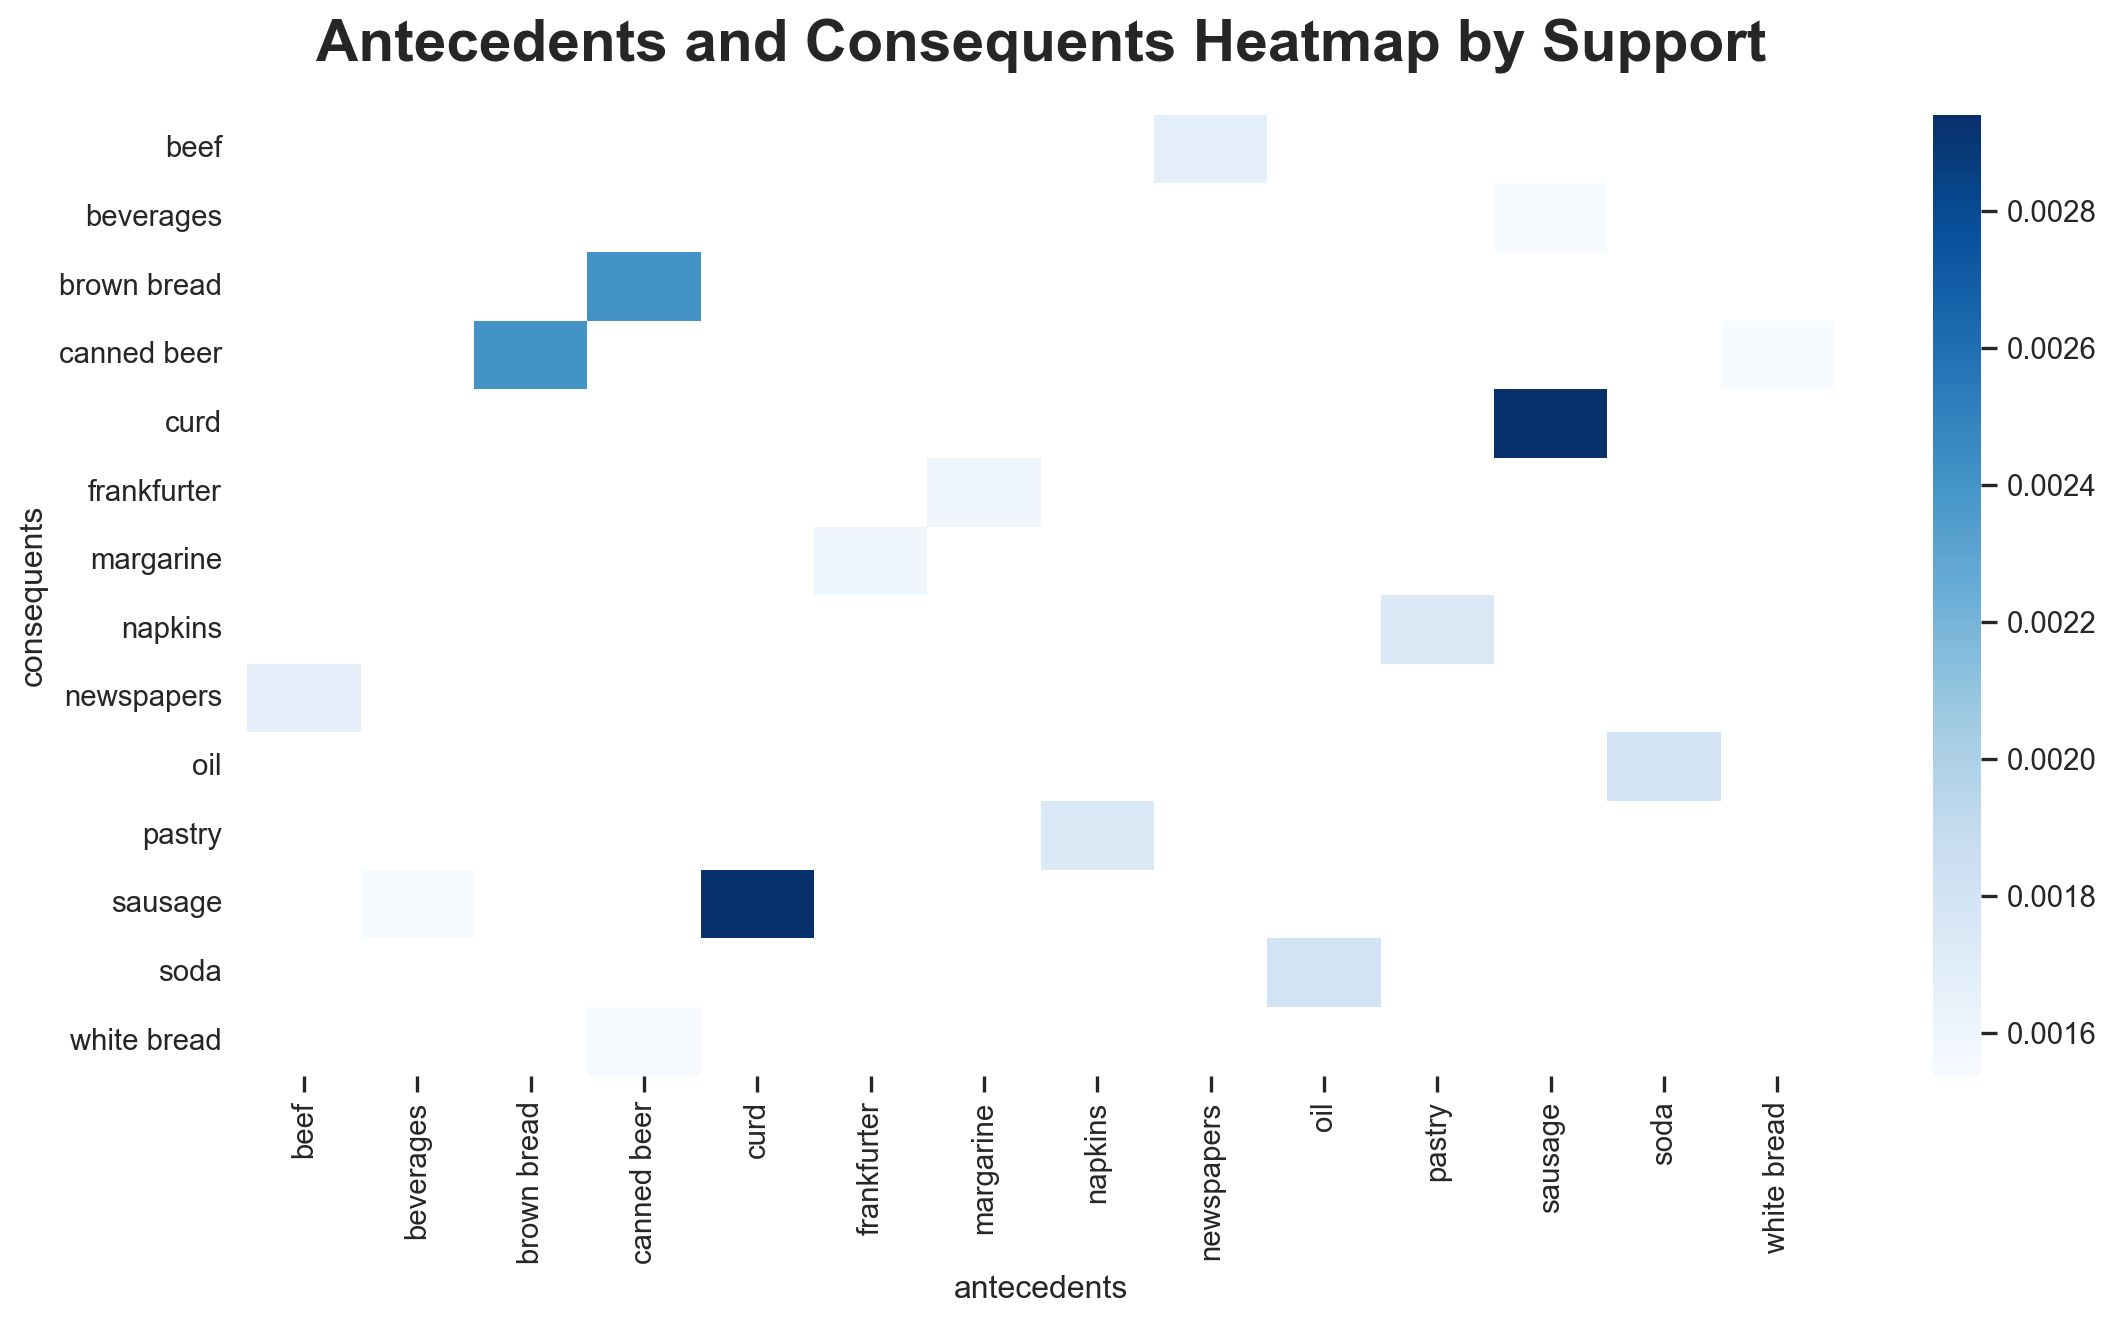

In [25]:
# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot, cmap="Blues")

# Title
plt.title('Antecedents and Consequents Heatmap by Support')

# Format and display plot
plt.yticks(rotation=0)
plt.show()

>Certainly! Upon analyzing the heatmap, we can identify a set of goods that exhibit strong associations, thus providing a promising starting point for shopping. Items that share a vibrant and pronounced color in the heatmap cells represent significant associations between them. These associations can guide us in creating a curated shopping experience.

### `Illuminating Associations: Exploring Lift with Heatmaps`
As our quest for insights deepens, we turn to the metric of lift to illuminate the associations between our products. Lift, with its unique ability to reveal the strength of co-occurrences, becomes our guiding light in this journey. To visualize the relationships, we summon the power of heatmaps once more, but this time with a focus on lift.

#### `Lifting the Veil on Lift`
Lift, the harbinger of partnership between items, stands as a metric that transcends the ordinary. It tells us whether two items co-occur more or less frequently than expected by chance alone. When lift is greater than 1, it signifies a positive relationship—a sign that the items are often found together, forming a harmonious duo. When lift is less than 1, the items tend to be purchased separately, their paths diverging.

#### `Annotating Insights with Precision`
To further refine our understanding, we summon annotations to replace the colorbar. These annotations will serve as signposts, marking values greater than the pivotal threshold of 1.0. This enables us to swiftly discern the strength and direction of the associations, guiding us towards making informed decisions.

As we navigate this landscape of lift, heatmaps, and annotations, we pave the way for a comprehensive analysis that transcends the ordinary. Our journey continues, driven by data, insights, and the unyielding pursuit of knowledge. 

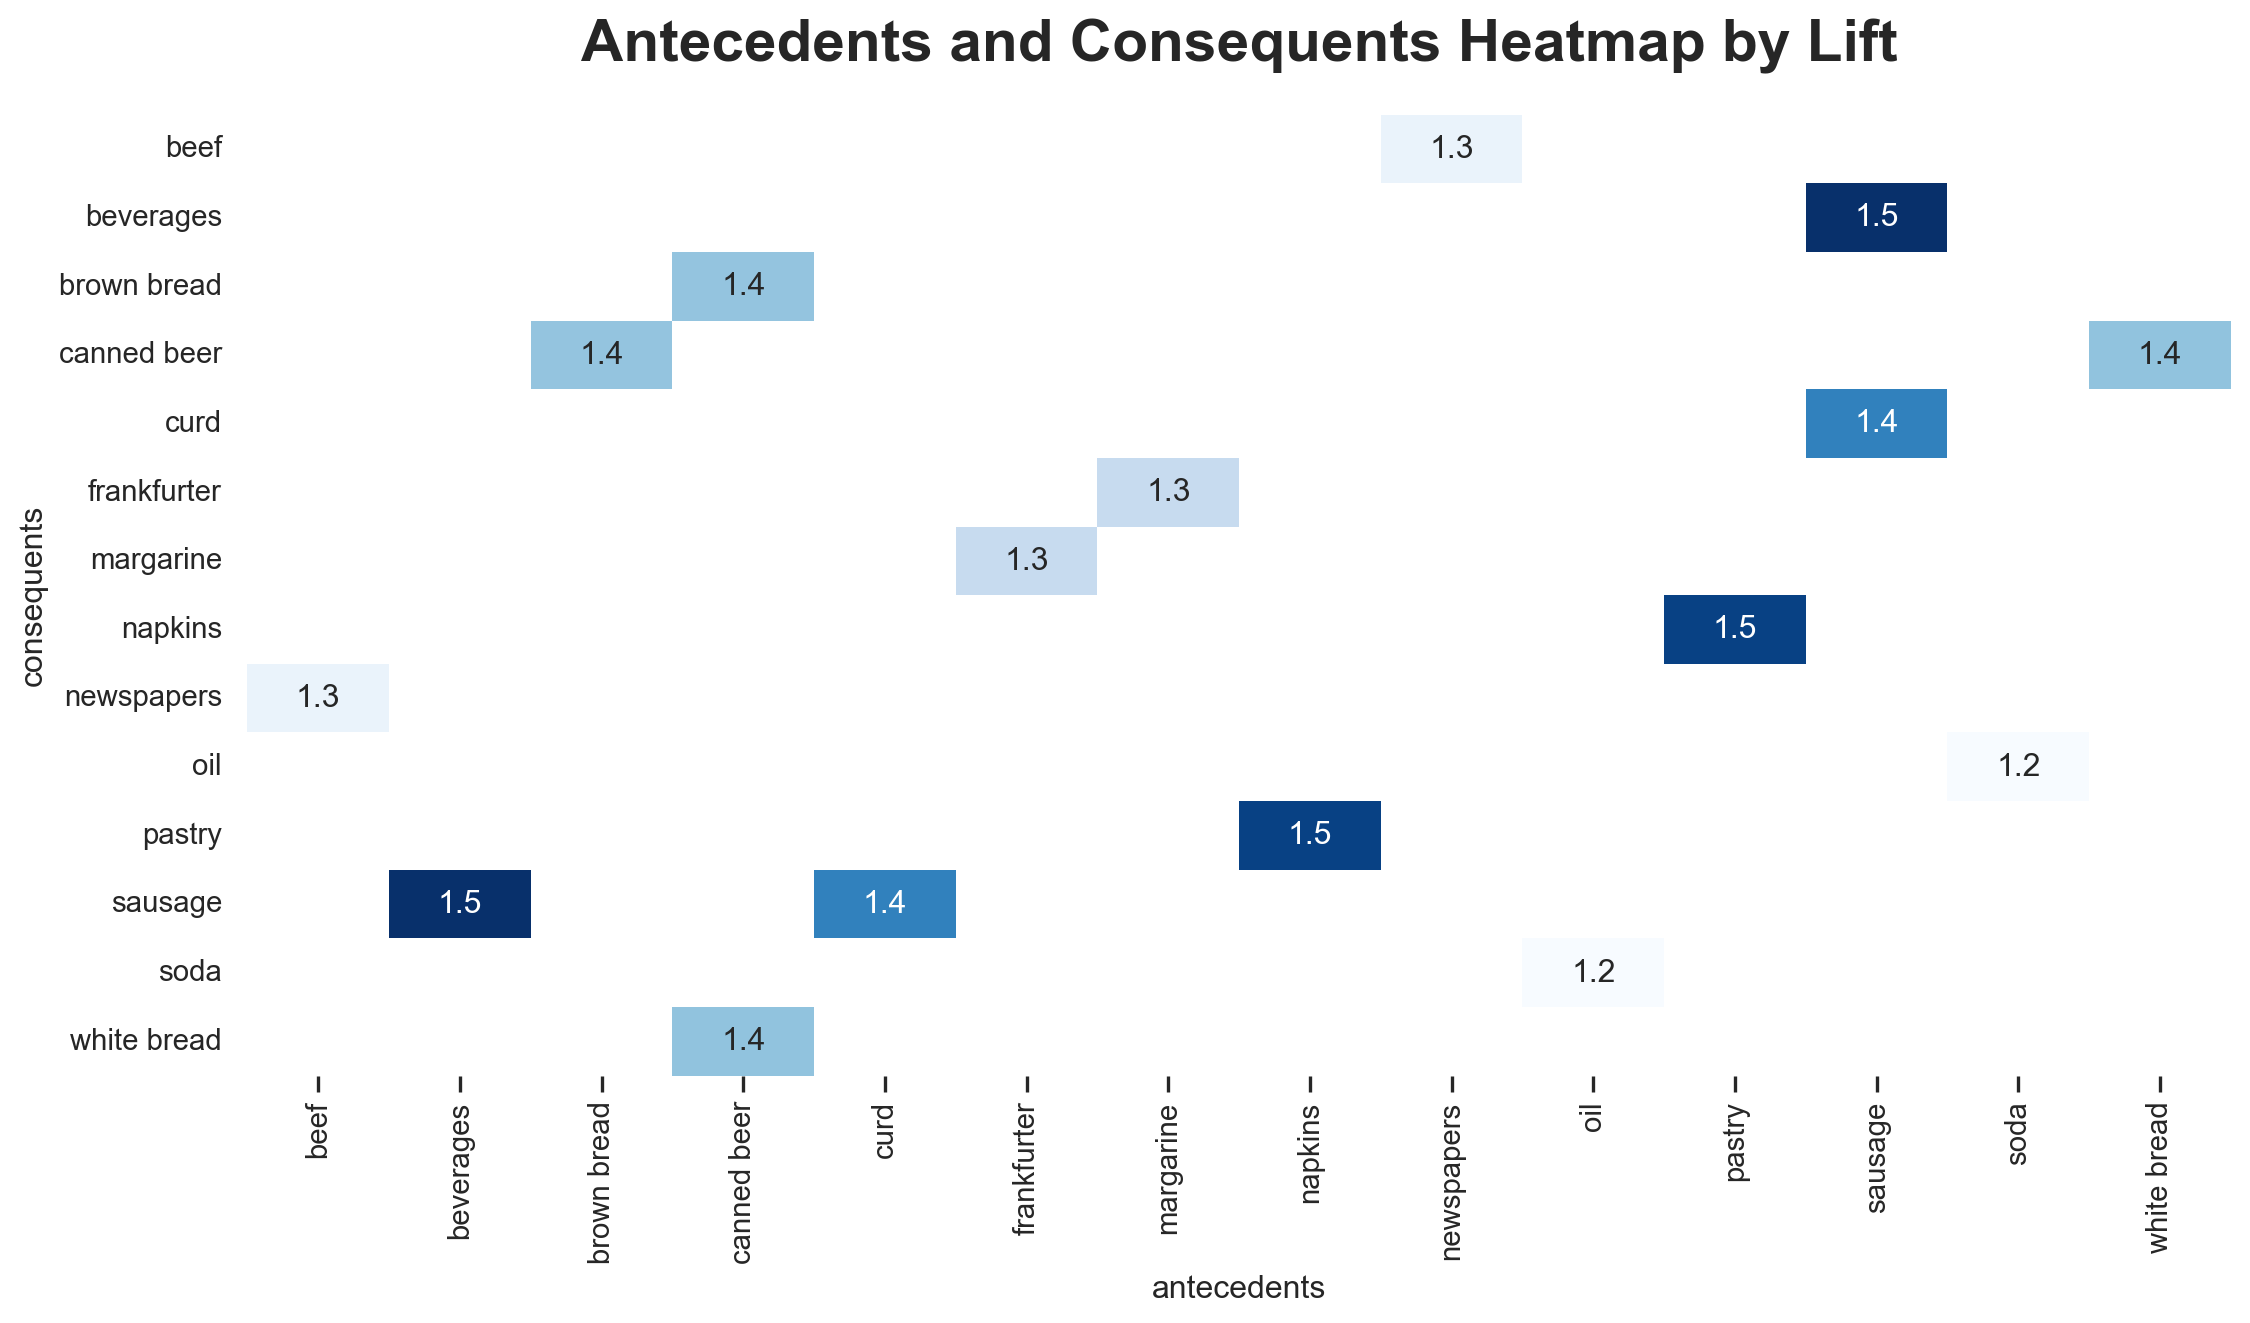

In [26]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar=False, cmap="Blues")

# Title
plt.title('Antecedents and Consequents Heatmap by Lift')

# Axis
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

>We want to consider focusing on items that have high support, confidence, and lift values. These metrics indicate strong relationships and potential cross-selling opportunities. By strategically placing these associated items near each other in the store layout, we can enhance the shopping experience for customers and encourage them to explore complementary products.

### `Visualizing Associations: Unveiling Patterns with Scatter Plots`
Let's take a look at the visual elegance of scatter plots. In our pursuit of insights, these plots become our companions, revealing hidden patterns and illuminating the relationships between items.

#### `Scattering Clues Across Axes`
A scatter plot elegantly captures the essence of association rules by portraying each rule as a point on a two-dimensional canvas. The x-axis represents the support, while the y-axis embodies the confidence meanwhile the dot size the lift. Each point whispers a story—a tale of how items intertwine, offering opportunities for cross-selling and enhancing customer experiences.

#### `The Dance of Interpretation`
As we gaze upon the points scattered across the canvas, we delve into the dance of interpretation. A point situated in the upper right quadrant signifies a strong association with both high confidence and lift. This heralds a harmonious partnership, where items often journey together, reflecting the preferences of our customers. On the other hand, points in the lower left quadrant may hint at opportunities for improvement, where items yearn for closer companionship.

#### `Guided by Insights`
With every point, we unearth insights that guide our decision-making. By examining this symphony of dots, we illuminate the strengths and weaknesses of our recommendations. Our journey through the realm of scatter plots empowers us with a visual narrative, enriching our understanding of the intricate relationships that shape our store's offerings.

Armed with scatter plots, data, and the spirit of exploration, we venture forth, uncovering associations that bring us closer to the heart of our customers' desires. 

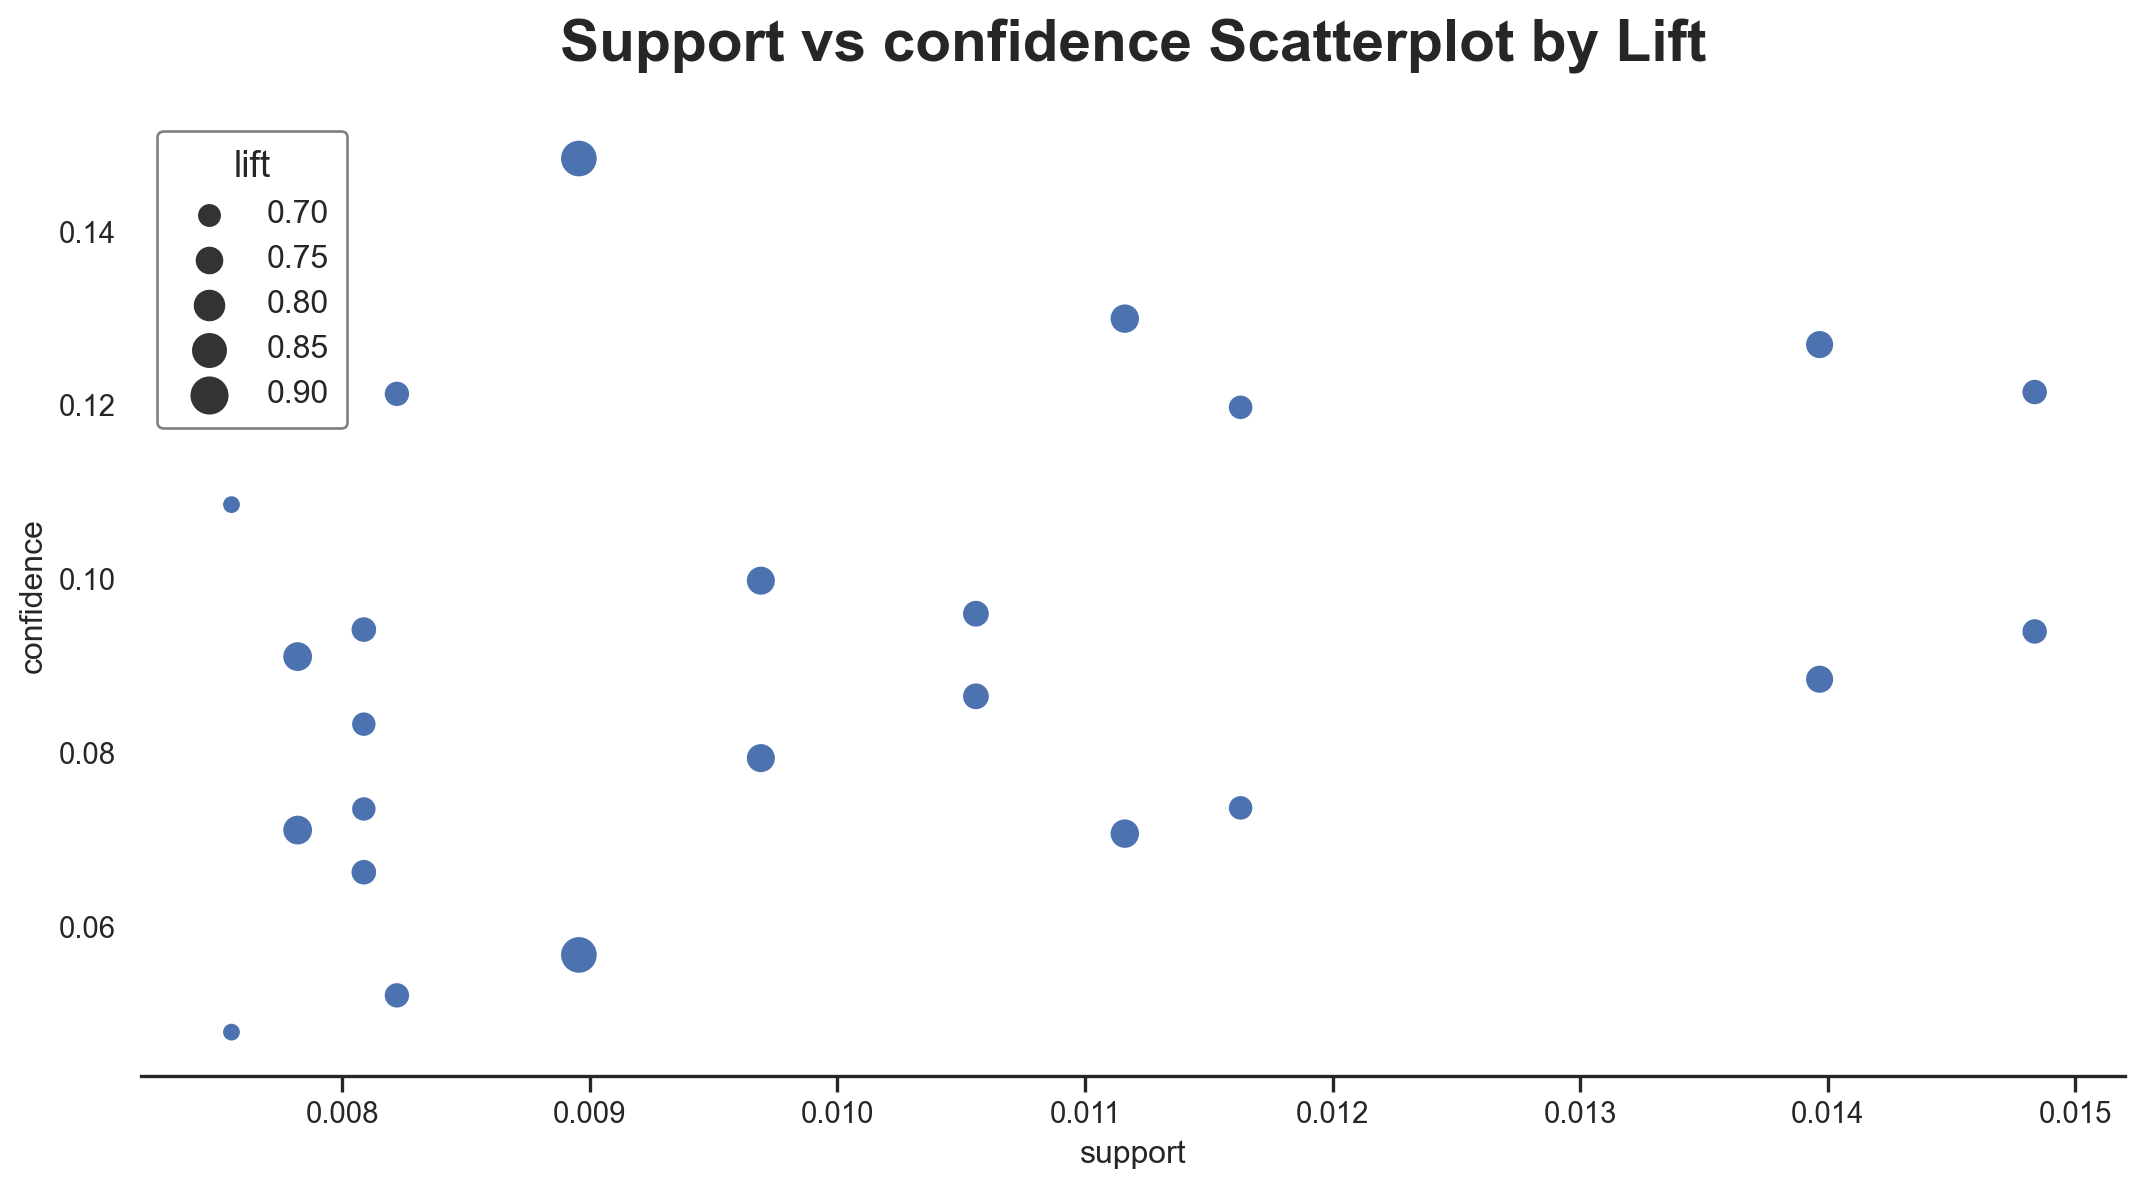

In [27]:
# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift",
                hue_norm=None, 
                data = rules)

# Title
plt.title('Support vs confidence Scatterplot by Lift')

plt.show()

>Absolutely, the journey through association rules and the use of scatter plots to visualize these relationships can truly provide us with valuable insights. It's fascinating how these plots allow us to see the connections between items in a more intuitive and informative manner. By exploring the dance of points on the canvas, we can discern trends, strengths, and areas for improvement in our product recommendations and cross-selling strategies. `The upper right quadrant becomes a beacon of promising partnerships, while the lower left quadrant beckons us to explore untapped possibilities`.

As we navigate through the realm of data-driven discovery, armed with scatter plots as our compass, we're poised to make informed decisions that resonate with the desires of our customers. With each point representing a unique tale of association, we're empowered to curate a shopping experience that not only reflects preferences but also enriches their journey. This blend of art and science, captured within the canvas of a scatter plot, allows us to unravel the intricate tapestry of relationships that shape our store's offerings.

#### `Parallel coordinates`: 
Combining `parallel_coordinates` with the Apriori algorithm is like composing a symphony where each instrument (feature) plays a crucial role in the final output. Apriori is commonly used for market basket analysis to identify frequent itemsets and association rules. While it may not be the most straightforward use case for `parallel_coordinates`, we can definitely derive some unique insights by using them together.

### How Apriori Fits In
Apriori primarily deals with transactional data, usually represented in a sparse matrix. Each row represents a transaction, and the columns represent items, often in a binary format (1 if the item is in the transaction, 0 otherwise).

### Adapting Parallel Coordinates
1. **Data Transformation**: Since Apriori operates on categorical transaction data and `parallel_coordinates` needs numerical data, we may translate frequent itemsets' support, confidence, or lift values into a dataframe.
  
2. **Feature Selection**: As we've identified crucial association rules or frequent itemsets using Apriori, these will be our 'features' for the parallel coordinate plot. Each line would represent an itemset, and each axis would be a metric like support, confidence, or lift.

3. **Class Labels**: We might color-code the lines based on some criterion that makes sense in our Apriori analysis context, like rules that exceed a certain confidence or lift threshold.

### Considerations
- **Interpreting the Plot**: In this case, the plot helps us visualize how various itemsets fare across different metrics. Like, we might see that itemsets with higher support might also generally have higher confidence or lift, and such insights.

In [28]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

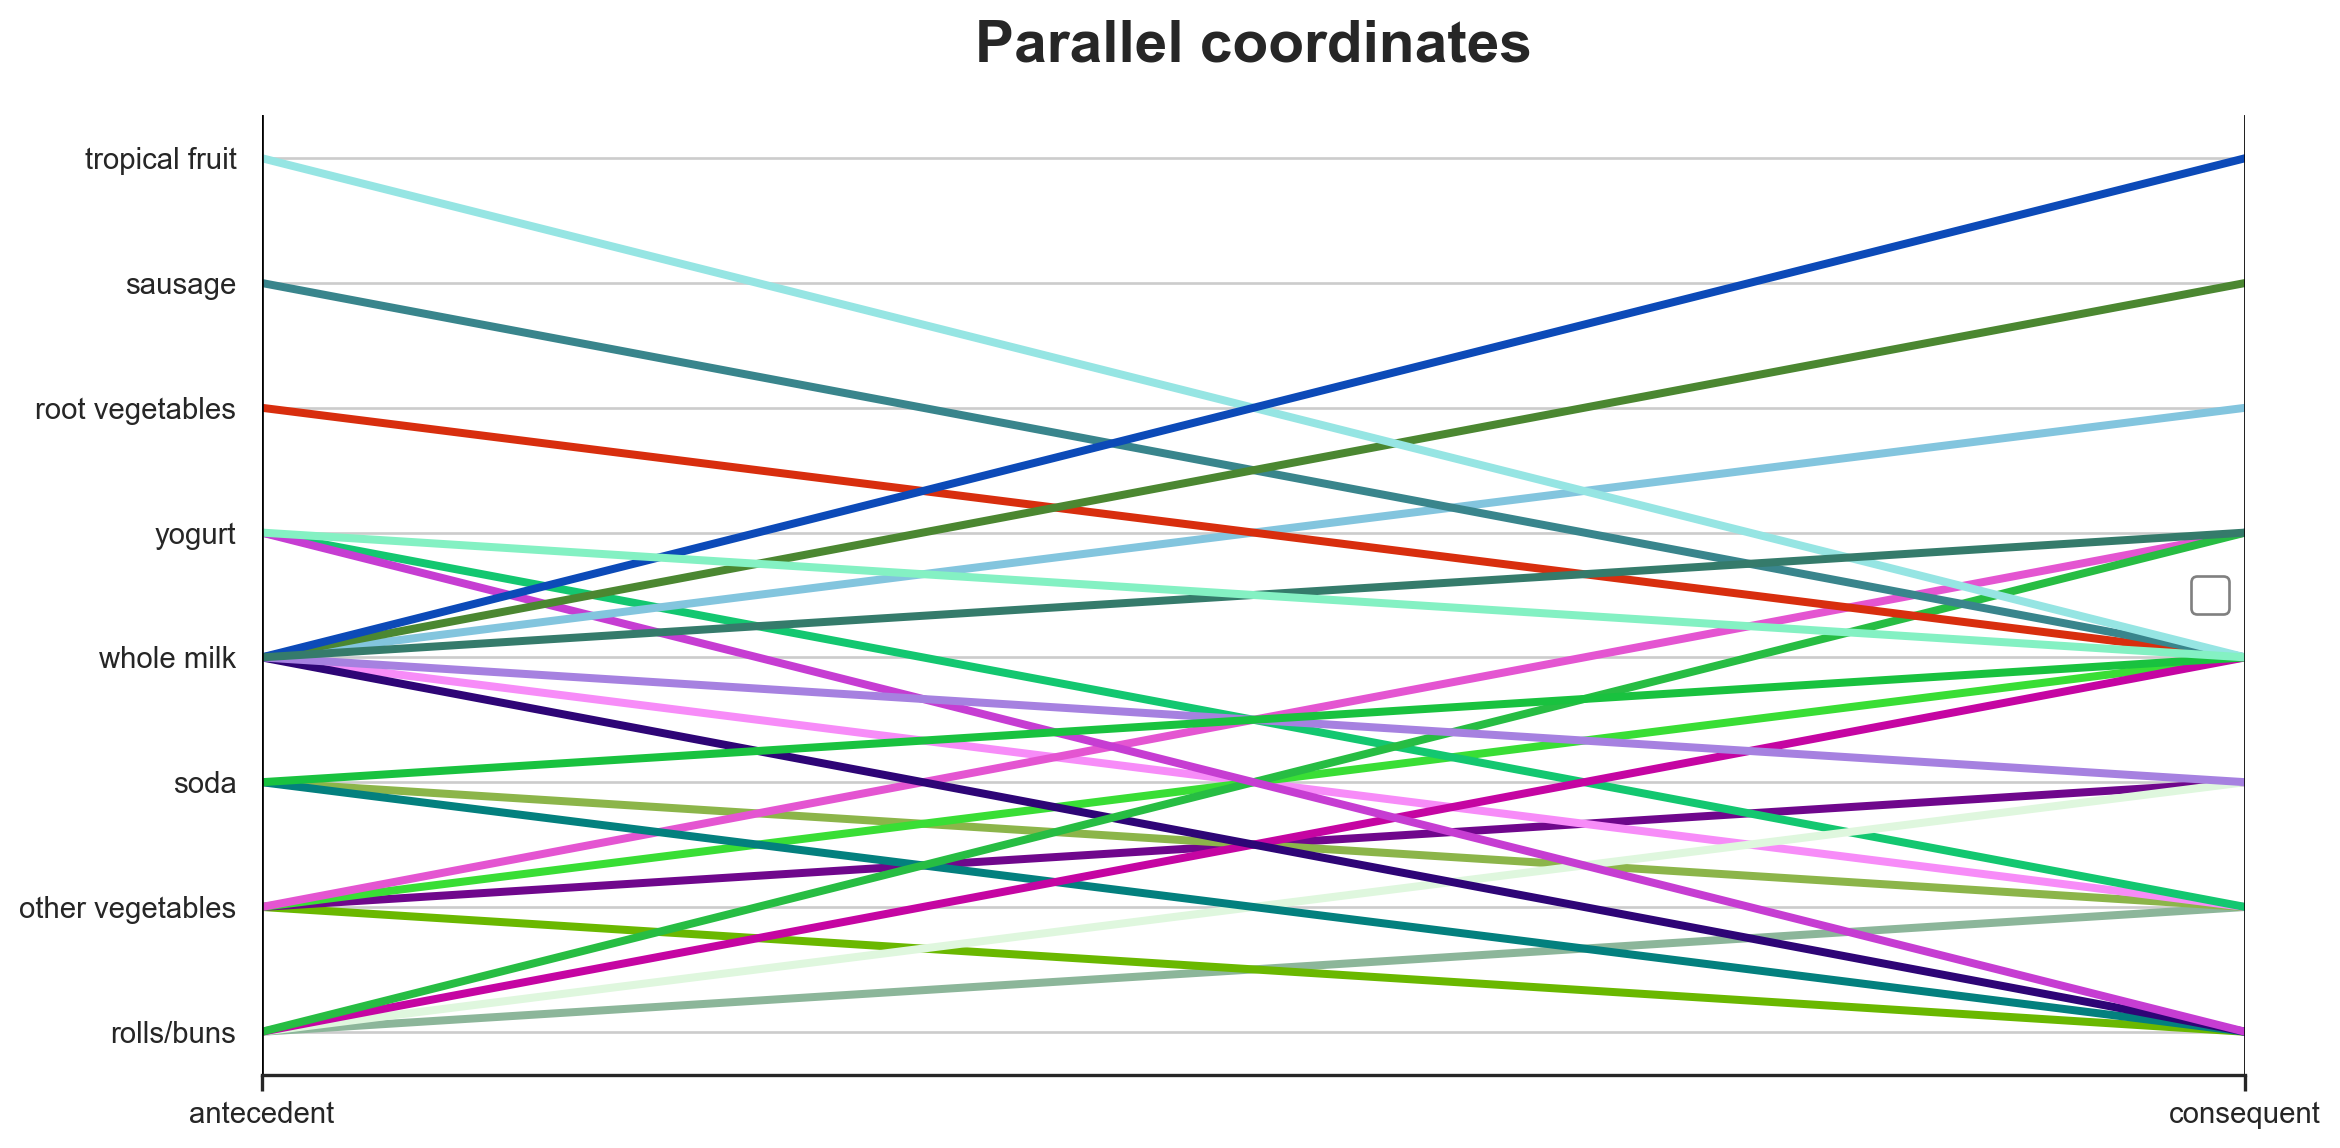

In [29]:
from pandas.plotting import parallel_coordinates

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = 'support', 
                          min_threshold = 0.0)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule')
plt.title('Parallel coordinates')
plt.legend([])
plt.show()

### `Conclusion`

**Market Basket Analysis and Association Rules:**
In the realm of data science, we embarked on a journey to understand how people's shopping habits can be unveiled through something called `"market basket analysis."` It's like discovering secrets hidden in the things people buy. Just like when we play with building blocks, we find out which ones go well together.

**Support, Confidence, Lift, and Other Metrics:**
We expose how to measure the strength of connections between items using metrics like "support," which tells us how often items appear together, and "confidence," which gauges the likelihood of buying one thing when you have another. Think of it like figuring out which toys we like to play with the most.

**Pruning and Refinement:**
Sometimes, there are too many rules to consider. So, we used techniques like "pruning" to trim down the list to the most important ones, just like selecting our favorite candies from a big box of treats. We also refined our choices using different metrics to make sure we had the best ones.

**Visualization Tools:**
We explored cool ways to see all these rules. Imagine it like drawing colorful pictures with dots and lines. Heatmaps showed us which items are closely related, and scatterplots helped us see which combinations are strong or weak, like the best buddies at school. And parallel coordinates plots made it look like a fun spider web, showing how items connect.

So, it's like when we're playing with toys or choosing snacks. Some toys or snacks are better when we have others, like peanut butter and jelly for sandwiches. And sometimes, we use special tools to make sure we find the best combinations. Just like finding the best toys to play with or the yummiest snacks to munch on, data science helps stores figure out what to sell together so you have an even better time shopping or snacking!

So, with this knowledge, we can make shopping more fun and exciting by offering to customer the things their like the most.